
	AAPL:
AAPL: YAHOO FINANCE RAW
                                 open         low        high       close  \
1980-12-12 14:30:00+00:00    0.128348    0.128348    0.128906    0.128348   
1980-12-15 14:30:00+00:00    0.122210    0.121652    0.122210    0.121652   
1980-12-16 14:30:00+00:00    0.113281    0.112723    0.113281    0.112723   
1980-12-17 14:30:00+00:00    0.115513    0.115513    0.116071    0.115513   
1980-12-18 14:30:00+00:00    0.118862    0.118862    0.119420    0.118862   
...                               ...         ...         ...         ...   
2024-03-13 13:30:00+00:00  172.770004  170.759995  173.190002  171.130005   
2024-03-14 13:30:00+00:00  172.910004  172.050003  174.309998  173.000000   
2024-03-15 13:30:00+00:00  171.169998  170.289993  172.619995  172.619995   
2024-03-18 13:30:00+00:00  175.570007  173.520004  177.710007  173.720001   
2024-03-19 13:30:00+00:00  174.089996  173.029999  176.604996  176.080002   

                             adjclose     v

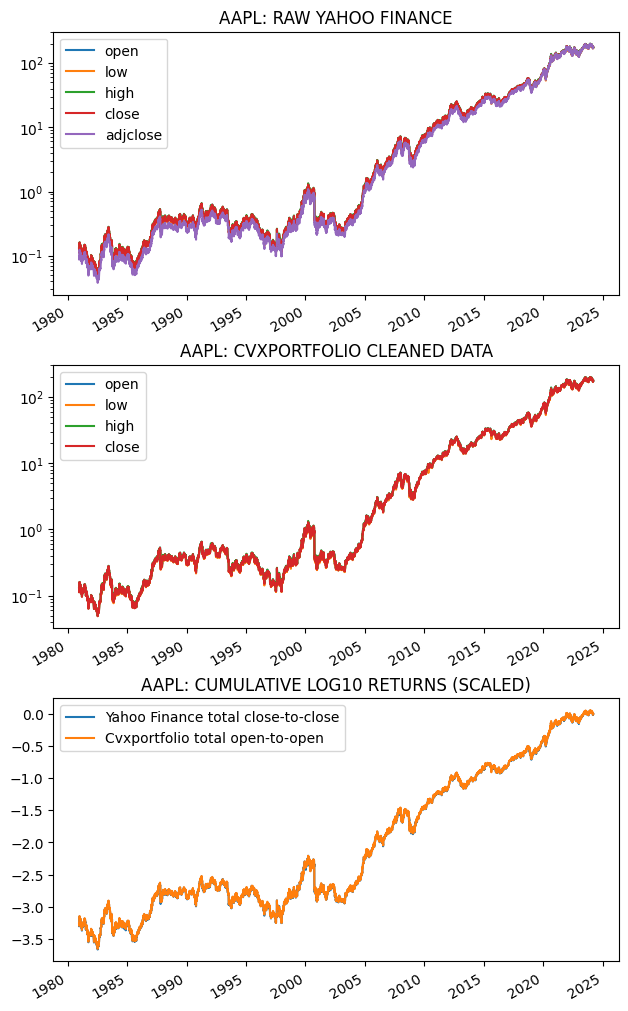


Cvxportfolio dropped 0% of rows
Max Cvxportfolio logreturn: 0.2362240276379786
Min Cvxportfolio logreturn: -0.5592989760683265
How many zero volumes: 9.168423947923352e-05

	GOOG:
GOOG: YAHOO FINANCE RAW
                                 open         low        high       close  \
2004-08-19 13:30:00+00:00    2.490664    2.390042    2.591785    2.499133   
2004-08-20 13:30:00+00:00    2.515820    2.503118    2.716817    2.697639   
2004-08-23 13:30:00+00:00    2.758411    2.716070    2.826406    2.724787   
2004-08-24 13:30:00+00:00    2.770615    2.579581    2.779581    2.611960   
2004-08-25 13:30:00+00:00    2.614201    2.587302    2.689918    2.640104   
...                               ...         ...         ...         ...   
2024-03-13 13:30:00+00:00  140.059998  140.009995  142.190002  140.770004   
2024-03-14 13:30:00+00:00  142.300003  141.485001  144.729996  144.339996   
2024-03-15 13:30:00+00:00  143.410004  141.130005  144.339996  142.169998   
2024-03-18 13:30:00+00:00

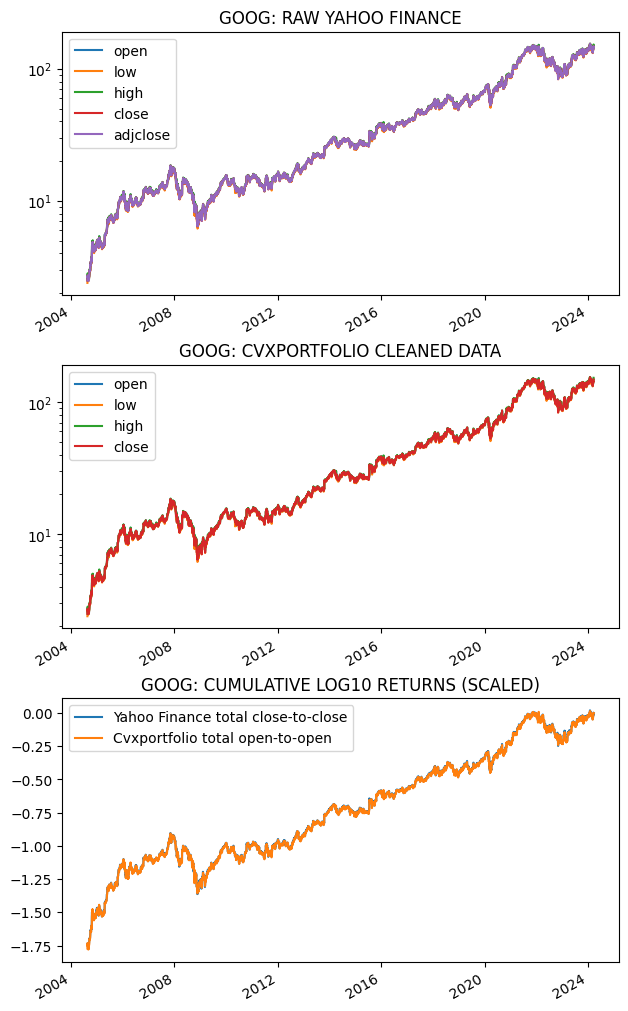


Cvxportfolio dropped 0% of rows
Max Cvxportfolio logreturn: 0.16638276519561407
Min Cvxportfolio logreturn: -0.12288528522385174
How many zero volumes: 0.0

	TSLA:
TSLA: YAHOO FINANCE RAW
                                 open         low        high       close  \
2010-06-29 13:30:00+00:00    1.266667    1.169333    1.666667    1.592667   
2010-06-30 13:30:00+00:00    1.719333    1.553333    2.028000    1.588667   
2010-07-01 13:30:00+00:00    1.666667    1.351333    1.728000    1.464000   
2010-07-02 13:30:00+00:00    1.533333    1.247333    1.540000    1.280000   
2010-07-06 13:30:00+00:00    1.333333    1.055333    1.333333    1.074000   
...                               ...         ...         ...         ...   
2024-03-13 13:30:00+00:00  173.050003  169.149994  176.050003  169.479996   
2024-03-14 13:30:00+00:00  167.770004  160.509995  171.169998  162.500000   
2024-03-15 13:30:00+00:00  163.160004  160.759995  165.179993  163.570007   
2024-03-18 13:30:00+00:00  170.020004  16

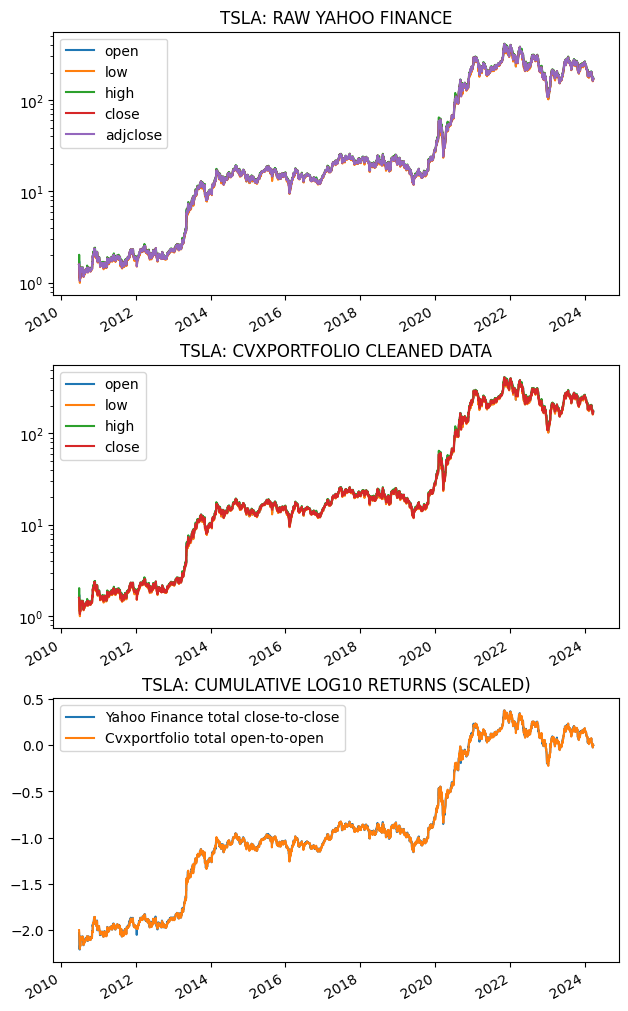


Cvxportfolio dropped 0% of rows
Max Cvxportfolio logreturn: 0.30554740767751887
Min Cvxportfolio logreturn: -0.2368931633286539
How many zero volumes: 0.0

Cvxportfolio dropped rows %:
AAPL    0.0
GOOG    0.0
TSLA    0.0
dtype: float64

Cvxportfolio min logreturns:
AAPL   -0.559299
TSLA   -0.236893
GOOG   -0.122885
dtype: float64

Cvxportfolio max logreturns:
GOOG    0.166383
AAPL    0.236224
TSLA    0.305547
dtype: float64


In [1]:
"""This script is used to show the data cleaning applied to Yahoo Finance data.

It is not really an example, and some of the methods shown here are not public,
so not covered by the semantic versioning agreeement (they could change
without notice).
"""

import shutil
import tempfile
from pathlib import Path
from time import sleep

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cvxportfolio as cvx

# Uncomment the following lines to get information about the cleaning procedure
# import logging
# logging.basicConfig(level=logging.INFO)
# log=logging.getLogger('=>')

# Here put any number of stocks for which you wish to analyze the cleaning
TEST_UNIVERSE = ['AAPL', 'GOOG', 'TSLA']

# Some names with known issues:
# TEST_UNIVERSE = ['SMT.L', 'NVR', 'HUBB', 'NWG.L', 'BA.L']

# Or, pick a larger universe
# from .universes import *
# TEST_UNIVERSE = DOW30

ALL_DROPPED_ROWS_PCT = pd.Series(dtype=float)
ALL_MIN_LR = pd.Series(dtype=float)
ALL_MAX_LR = pd.Series(dtype=float)

PLOT = True
SLEEP = 1

for stock in TEST_UNIVERSE:
    sleep(SLEEP)
    print(f'\n\t{stock}:')

    # This method is not public:
    raw_yfinance = cvx.YahooFinance._get_data_yahoo(stock)
    print(f'{stock}: YAHOO FINANCE RAW')
    print(raw_yfinance)

    tmpdir = Path(tempfile.mkdtemp())
    cvx_cleaned = cvx.YahooFinance(stock, base_location=tmpdir).data
    shutil.rmtree(tmpdir)
    print(f'{stock}: CVXPORTFOLIO CLEANED')
    print(cvx_cleaned)

    yf_log10r = np.log10(raw_yfinance.adjclose).diff().shift(-1)
    cvx_log10r = np.log10(1 + cvx_cleaned['return'])

    if PLOT:
        fig, axes = plt.subplots(
            3, figsize=(10/1.62, 10), layout='constrained')

        raw_yfinance.iloc[:, :5].plot(ax=axes[0])
        axes[0].set_yscale('log')
        axes[0].set_title(f'{stock}: RAW YAHOO FINANCE')

        cvx_cleaned.iloc[:, :4].plot(ax=axes[1])
        axes[1].set_title(f'{stock}: CVXPORTFOLIO CLEANED DATA')
        axes[1].set_yscale('log')

        (yf_log10r.cumsum() - yf_log10r.sum()).plot(
            label='Yahoo Finance total close-to-close', ax=axes[2])
        (cvx_log10r.cumsum() - cvx_log10r.sum()).plot(
            label='Cvxportfolio total open-to-open', ax=axes[2])
        axes[2].set_title(f'{stock}: CUMULATIVE LOG10 RETURNS (SCALED)')
        axes[2].legend()

        plt.show()

    assert cvx_cleaned.index[-1] == raw_yfinance.index[-1]

    print()
    dropped_rows = len(raw_yfinance) - len(cvx_cleaned)
    dropped_rows_pct = dropped_rows / len(raw_yfinance)
    ALL_DROPPED_ROWS_PCT.loc[stock] = dropped_rows_pct*100
    print(f'Cvxportfolio dropped {int(dropped_rows_pct*100)}% of rows')

    ALL_MIN_LR.loc[stock] = np.log(1+cvx_cleaned['return']).min()
    ALL_MAX_LR.loc[stock] = np.log(1+cvx_cleaned['return']).max()

    print('Max Cvxportfolio logreturn:', ALL_MAX_LR.loc[stock])
    print('Min Cvxportfolio logreturn:', ALL_MIN_LR.loc[stock] )
    print('How many zero volumes:', (cvx_cleaned['valuevolume'] == 0.).mean())

print('\nCvxportfolio dropped rows %:')
print(ALL_DROPPED_ROWS_PCT.sort_values().tail())

print('\nCvxportfolio min logreturns:')
print(ALL_MIN_LR.sort_values().head())

print('\nCvxportfolio max logreturns:')
print(ALL_MAX_LR.sort_values().tail())

In [ ]:
import pdb; pdb.set_trace()